# Does school funding impact students academic performance?

<img src="../notebooks/images/education-header.jpg" width="900" />



**Credit:**  [techxend](https://www.techxtend.com/site/content/education/) 

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

#sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# read file
df = pd.read_csv('schools_final_economic_merged.csv', index_col = 0)
df.head(5)

School Name       District Name  District Code_x  \
67    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
66    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
68    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
69    A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   
5359  A. E. ARNOLD ELEMENTARY  CYPRESS ELEMENTARY         610440.0   

      Total Enrollment  Full-Time Equivalent (FTE) Teachers  \
67               756.0                                 28.0   
66               756.0                                 28.0   
68               756.0                                 28.0   
69               756.0                                 28.0   
5359             756.0                                 28.0   

      Pupil/Teacher Ratio  Total Revenue (TOTALREV) per Pupil   \
67                   27.0                              11980.0   
66                   27.0                              11980.0   
68                   27.0                              11980.0   
69                   27.0                              11980.0   
5359                 27.0                              11980.0   

      Total Revenue - Local Sources (TLOCREV) per Pupil   \
67                                               6149.0    
66                                               6149.0    
68                                               6149.0    
69                                               6149.0    
5359                                             6149.0    

      Total Revenue - State Sources (TSTREV) per Pupil  \
67                                              5210.0   
66                                              5210.0   
68                                              5210.0   
69                                              5210.0   
5359                                            5210.0   

      Total Revenue - Federal Sources (TFEDREV) per Pupil     ...     \
67                                                622.0       ...      
66                                                622.0       ...      
68                                                622.0       ...      
69                                                622.0       ...      
5359                                              622.0       ...      

      CAASPP Reported Enrollment  Students Tested  Students with Scores  \
67                         118.0            111.0                 111.0   
66                         118.0            116.0                 116.0   
68                          28.0             28.0                  28.0   
69                          28.0             28.0                  28.0   
5359                        78.0             76.0                  76.0   

      Total Standard Exceeded  Total Standard Met  \
67                       48.0                36.0   
66                       60.0                32.0   
68                       13.0                10.0   
69                       17.0                 5.0   
5359                     11.0                24.0   

      Total Standard Met and Above  Total Standard Nearly Met  \
67                            84.0                       16.0   
66                            92.0                       20.0   
68                            23.0                        0.0   
69                            22.0                        5.0   
5359                          35.0                       26.0   

      Total Standard Not Met      Disadvantaged  Zip Code  
67                      11.0  Not Disadvantaged     90630  
66                       4.0  Not Disadvantaged     90630  
68                       5.0      Disadvantaged     90630  
69                       1.0      Disadvantaged     90630  
5359                    15.0      Disadvantaged     90630  

[5 rows x 39 columns]

### Understanding the dataset to perform the analysis

In [3]:
# columns present on the dataset
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [4]:
#Converting all the assessment columns back to  percentage columns for exceeded, nearly met, not met to show completion results as percentage of test taken
df['Percentate Std Exceed'] =(df['Total Standard Exceeded']/df['Students Tested']*100).round(decimals=0)
df['Percentage Std Met'] =(100*df['Total Standard Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Nearly Met'] =(100*df['Total Standard Nearly Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Not Met'] =(100*df['Total Standard Not Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Met and Above'] =(100*df['Total Standard Met and Above']/df['Students Tested']).round(decimals=0)

#Percentage was multiplied by the students tested information and not the total enrollment information.
#Students tested in Math and Literacy can be the same students or different students, we don't have that information.
#we are adding the results of both exams, this can cause a duplicate in value of students tested, I will separate both datasets

In [6]:
df['Pass'] = df['Percentate Std Exceed'] + df['Percentage Std Met']
df['Fail'] = df['Percentage Std Nearly Met'] + df['Percentage Std Not Met']

In [7]:
# columns present on the dataset
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

In [8]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['Asian or Asian/Pacific Islander', 'Hispanic', 'White',
       'Two or More Races', 'Black', 'Hawaiian Nat./Pacific Isl.',
       'American Indian/Alaska Native'], dtype=object)

## Filtering for outliers

## Total Enrollment

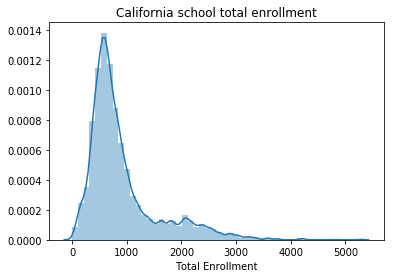

In [9]:
# with outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Total Enrollment'])
plt.title('California school total enrollment')
plt.show()

In [10]:
# Using IQR to define outliers and filter dataset based on that
enrollment = df['Total Enrollment']

iqr = enrollment.quantile(q=.75) - enrollment.quantile(q=0.25)

lower_outlier = enrollment.quantile(q=0.25) - (1.5*iqr)
upper_outlier = enrollment.quantile(q=0.75) + (1.5*iqr)

print(
    "Outliers fall below {:.2f} and above {:.2f}".format(lower_outlier, upper_outlier)
)

Outliers fall below -281.00 and above 1823.00


In [11]:
# filtering total enrollment using outliers as cut-off
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] < 1823]

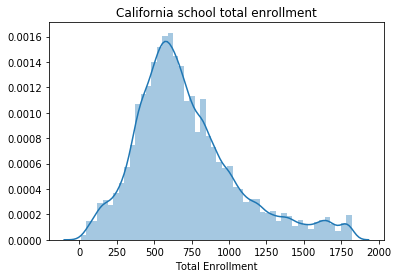

In [12]:
# without outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Total Enrollment'])
plt.title('California school total enrollment')
plt.show()

## Total Revenue

In [13]:
# checking revenue per student data
df['Total Revenue (TOTALREV) per Pupil '].describe()

count     38564.000000
mean      13852.536303
std        7357.633062
min           0.000000
25%       12151.000000
50%       13205.000000
75%       14290.000000
max      369640.000000
Name: Total Revenue (TOTALREV) per Pupil , dtype: float64

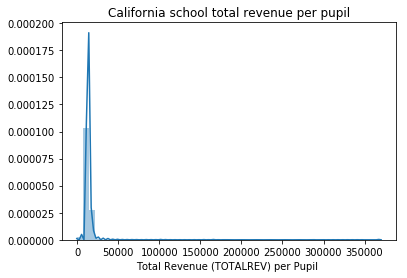

In [14]:
# with outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Total Revenue (TOTALREV) per Pupil '])
plt.title('California school total revenue per pupil')
plt.show()

In [15]:
# filtering total revenue column based on outliers
revenue = df['Total Revenue (TOTALREV) per Pupil ']

iqr = revenue.quantile(q=.75) - revenue.quantile(q=0.25)

lower_outlier = revenue.quantile(q=0.25) - (1.5*iqr)
upper_outlier = revenue.quantile(q=0.75) + (1.5*iqr)

print(
    "Outliers fall below {:.2f} and above {:.2f}".format(lower_outlier, upper_outlier)
)

Outliers fall below 8942.50 and above 17498.50


In [16]:
# dataset containing schools funding per pupil
df_high_funding = df[(df['Total Revenue (TOTALREV) per Pupil '] > 17498)]
df_low_funding = df[(df['Total Revenue (TOTALREV) per Pupil '] < 8942.5)]

# update the main dataset
df = df[(df['Total Revenue (TOTALREV) per Pupil '] < 17498)]
df = df[(df['Total Revenue (TOTALREV) per Pupil '] >= 8942.5)]

print(df_high_funding.shape)
print(df_low_funding.shape)
print(df.shape)

(1729, 46)
(776, 46)
(36059, 46)


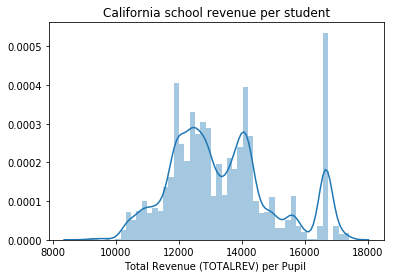

In [17]:
# histogram without ourliers
plt.figure(figsize=(6,4))
sns.distplot(df['Total Revenue (TOTALREV) per Pupil '])
plt.title('California school revenue per student')
plt.show()

## Full-time equivalent teachers

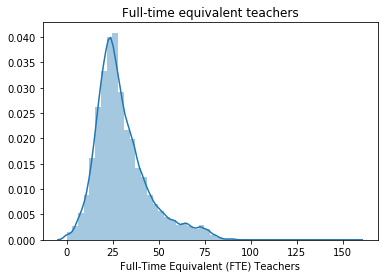

In [18]:
# histogram with outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Full-Time Equivalent (FTE) Teachers'])
plt.title('Full-time equivalent teachers')
plt.show()

In [19]:
# filtering 'Full-Time Equivalent (FTE) Teachers' column based on outliers
FTE = df['Full-Time Equivalent (FTE) Teachers']

iqr = FTE.quantile(q=.75) - FTE.quantile(q=0.25)

lower_outlier = FTE.quantile(q=0.25) - (1.5*iqr)
upper_outlier = FTE.quantile(q=0.75) + (1.5*iqr)

print(
    "Outliers fall below {:.2f} and above {:.2f}".format(lower_outlier, upper_outlier)
)

Outliers fall below -3.80 and above 60.80


In [19]:
# filtering 'Full-Time Equivalent (FTE) Teachers' using outliers as cut-off
df = df[df['Full-Time Equivalent (FTE) Teachers'] < 60.8]
df = df[df['Full-Time Equivalent (FTE) Teachers'] > 0]

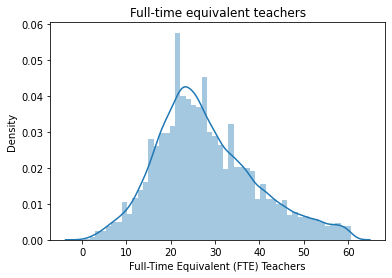

In [20]:
# histogram without outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Full-Time Equivalent (FTE) Teachers'])
plt.title('Full-time equivalent teachers')
plt.show()

## Pupil/Teacher Ratio

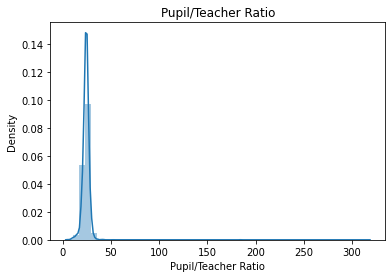

In [21]:
# histogram with outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Pupil/Teacher Ratio'])
plt.title('Pupil/Teacher Ratio')
plt.show()

In [22]:
# filtering 'Full-Time Equivalent (FTE) Teachers' column based on outliers
pupil_teacher = df['Pupil/Teacher Ratio']

iqr = pupil_teacher.quantile(q=.75) - pupil_teacher.quantile(q=0.25)

lower_outlier = pupil_teacher.quantile(q=0.25) - (1.5*iqr)
upper_outlier = pupil_teacher.quantile(q=0.75) + (1.5*iqr)

print(
    "Outliers fall below {:.2f} and above {:.2f}".format(lower_outlier, upper_outlier)
)

Outliers fall below 17.07 and above 31.12


In [23]:
# filtering 'Full-Time Equivalent (FTE) Teachers' using outliers as cut-off
df = df[df['Pupil/Teacher Ratio'] > 17.07]
df = df[df['Pupil/Teacher Ratio'] < 31.12]

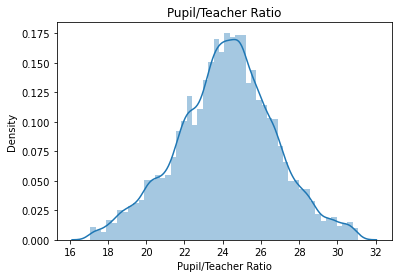

In [24]:
# histogram without outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Pupil/Teacher Ratio'])
plt.title('Pupil/Teacher Ratio')
plt.show()

## Total Expenditures per Pupil

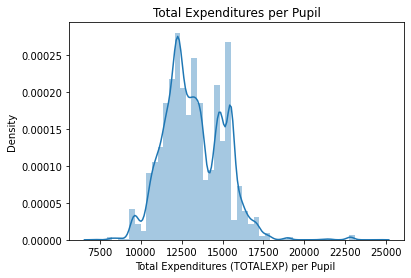

In [25]:
# histogram with outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Total Expenditures (TOTALEXP) per Pupil '])
plt.title('Total Expenditures per Pupil')
plt.show()

In [26]:
# filtering 'Total Expenditures (TOTALEXP) per Pupil ' column based on outliers
total_exp = df['Total Expenditures (TOTALEXP) per Pupil ']

iqr = total_exp.quantile(q=.75) - total_exp.quantile(q=0.25)

lower_outlier = total_exp.quantile(q=0.25) - (1.5*iqr)
upper_outlier = total_exp.quantile(q=0.75) + (1.5*iqr)

print(
    "Outliers fall below {:.2f} and above {:.2f}".format(lower_outlier, upper_outlier)
)

Outliers fall below 7925.50 and above 18801.50


In [27]:
# filtering 'Total Expenditures (TOTALEXP) per Pupil' using outliers as cut-off
df = df[df['Total Expenditures (TOTALEXP) per Pupil '] > 7925.50]
df = df[df['Total Expenditures (TOTALEXP) per Pupil '] < 18801.50]

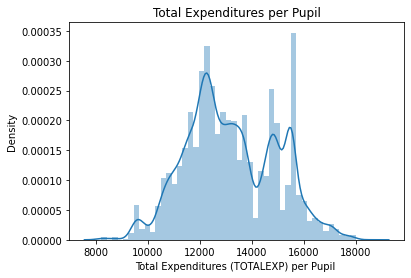

In [28]:
# histogram without outliers
plt.figure(figsize=(6,4))
sns.distplot(df['Total Expenditures (TOTALEXP) per Pupil '])
plt.title('Total Expenditures per Pupil')
plt.show()

## Scatterplots
### - revenue vs enrollment with disadvantaged as category

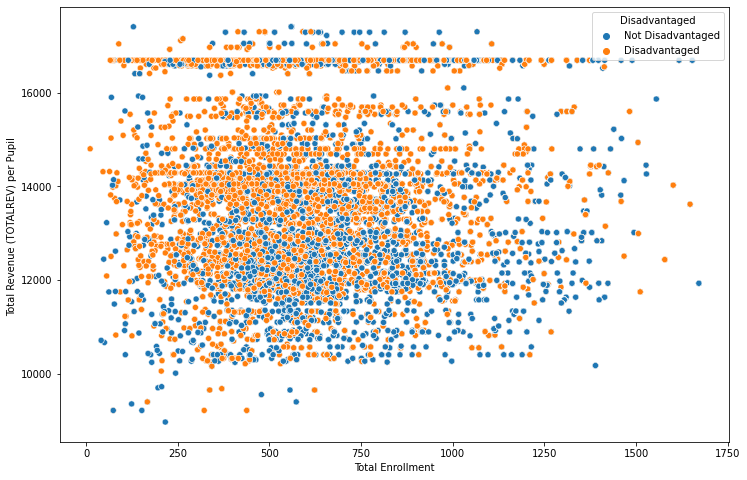

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Enrollment', y='Total Revenue (TOTALREV) per Pupil ', hue='Disadvantaged', data=df)
plt.show()

### - mean scale score vs enrollment with disadvantaged as category

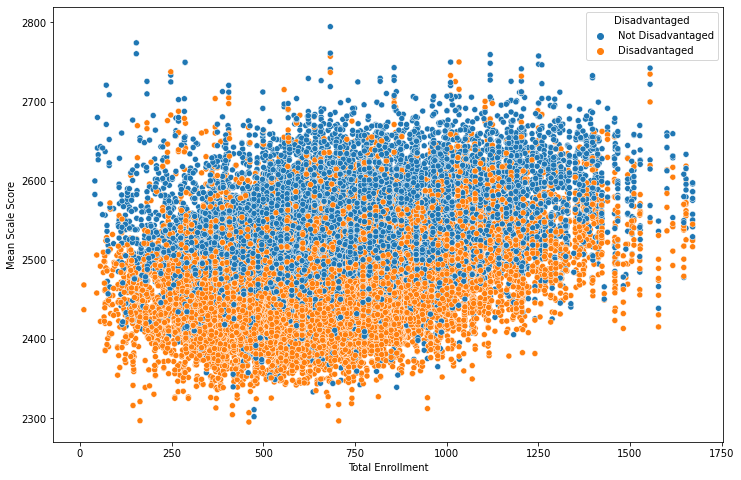

In [30]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Enrollment', y='Mean Scale Score', hue='Disadvantaged', data=df)
plt.show()

### - mean scale score vs revenue with disadvantaged as category

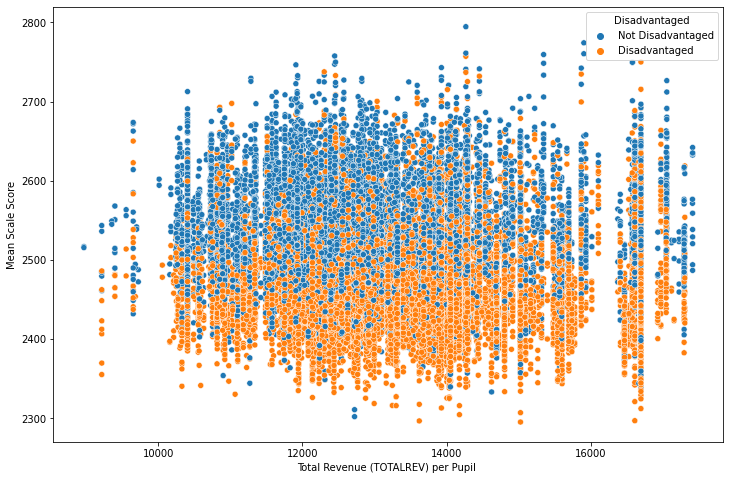

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total Revenue (TOTALREV) per Pupil ', y='Mean Scale Score', hue='Disadvantaged', data=df)
plt.show()

## Visualizing Relationships

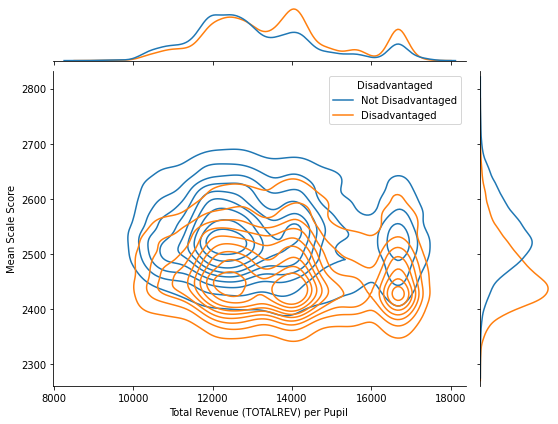

In [32]:
# visualizing variables of interest

_ = sns.jointplot(x='Total Revenue (TOTALREV) per Pupil ', y='Mean Scale Score', hue='Disadvantaged', data=df, kind="kde")
_.fig.set_size_inches(8,6)


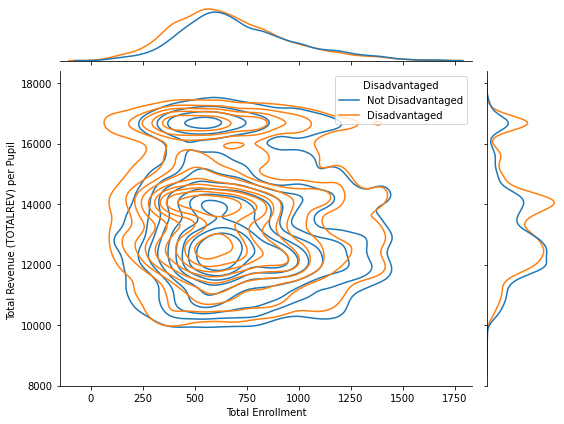

In [33]:
# visualizing variables of interest

_ = sns.jointplot(x='Total Enrollment', y='Total Revenue (TOTALREV) per Pupil ', hue='Disadvantaged', data=df, kind="kde")
_.fig.set_size_inches(8,6)

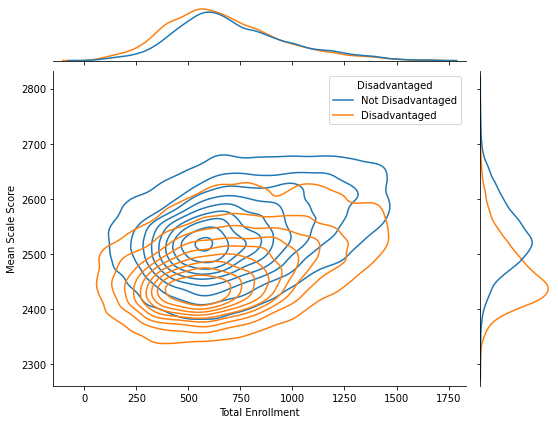

In [34]:
# jointplot

_ = sns.jointplot(x='Total Enrollment', y='Mean Scale Score', hue='Disadvantaged', data=df, kind="kde")
_.fig.set_size_inches(8,6)

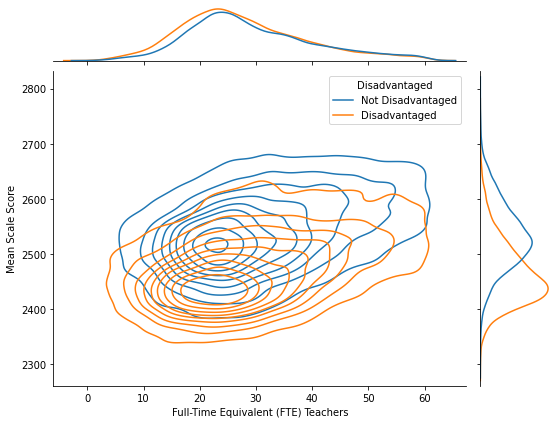

In [35]:
_ = sns.jointplot(x='Full-Time Equivalent (FTE) Teachers', y='Mean Scale Score', hue='Disadvantaged', data=df, kind="kde")
_.fig.set_size_inches(8,6)

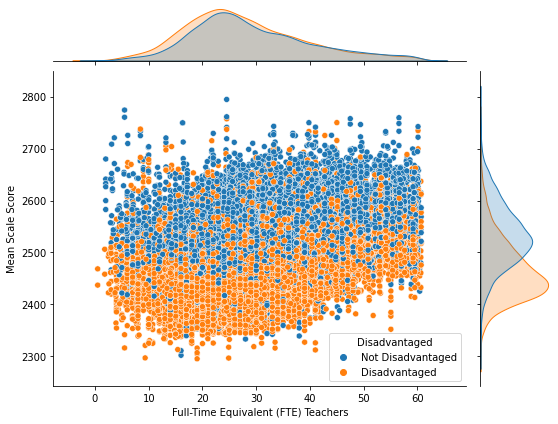

In [36]:
_ = sns.jointplot(x='Full-Time Equivalent (FTE) Teachers', y='Mean Scale Score', hue='Disadvantaged', data=df)
_.fig.set_size_inches(8,6)

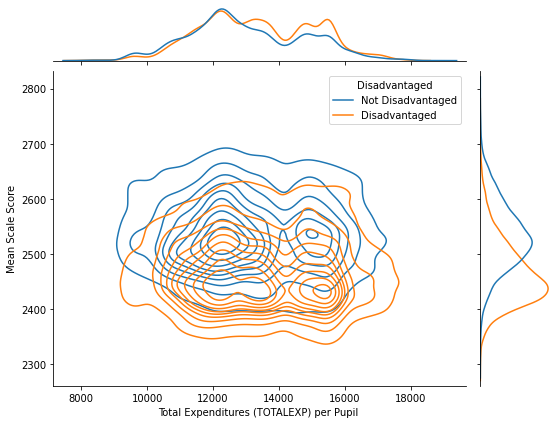

In [37]:
_ = sns.jointplot(x='Total Expenditures (TOTALEXP) per Pupil ', y='Mean Scale Score', hue='Disadvantaged', data=df, kind="kde")
_.fig.set_size_inches(8,6)

Text(0.5, 1.0, 'Total revenue per pupil per disadvantaged category')

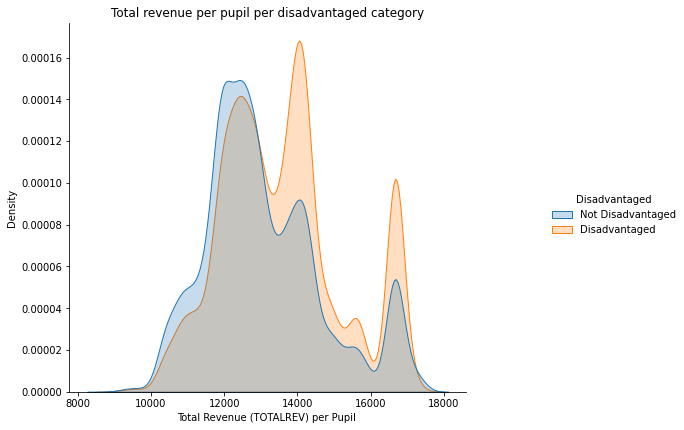

In [38]:
_ = sns.displot(df, x='Total Revenue (TOTALREV) per Pupil ', hue='Disadvantaged', kind="kde", fill=True)
_.fig.set_size_inches(10,6)
plt.title("Total revenue per pupil per disadvantaged category")

Text(0.5, 1.0, 'Mean scale score comparative plot per disadvantaged category')

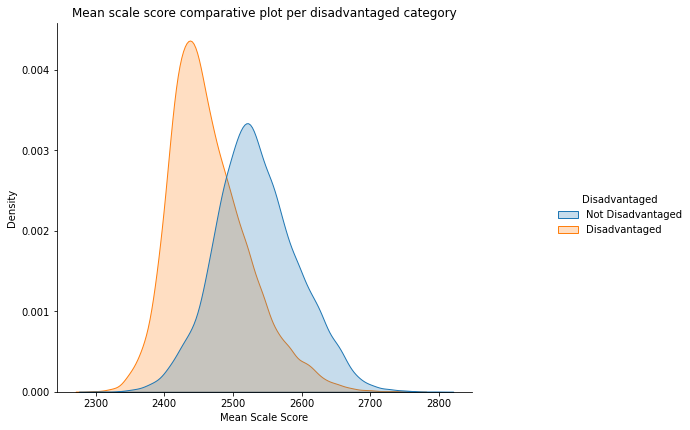

In [39]:
_ = sns.displot(df, x='Mean Scale Score', hue='Disadvantaged', kind="kde", fill=True)
_.fig.set_size_inches(10,6)
plt.title("Mean scale score comparative plot per disadvantaged category")

Text(0.5, 1.0, 'Mean scale score comparative plot per ethnicity')

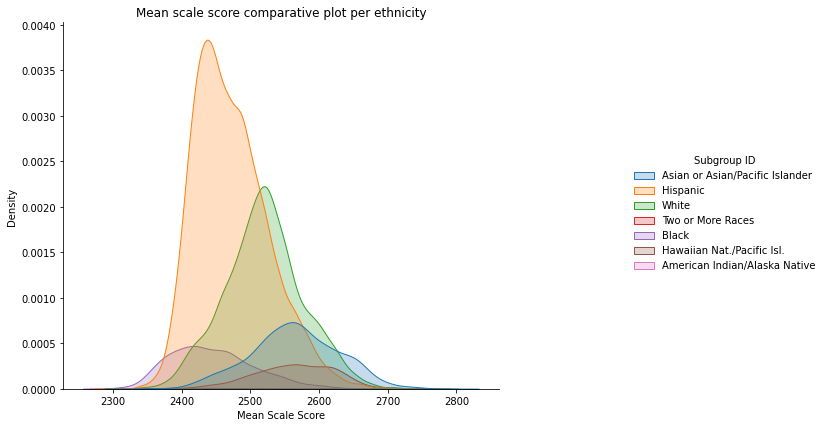

In [40]:
# comparative histogram
_ = sns.displot(df, x='Mean Scale Score', hue='Subgroup ID', kind="kde", fill=True)
_.fig.set_size_inches(12,6)
plt.xlabel("Mean Scale Score")
plt.ylabel("Density")
plt.title("Mean scale score comparative plot per ethnicity")

Text(0.5, 1.0, 'Full-time Equivalent Teachers with Disadvantaged')

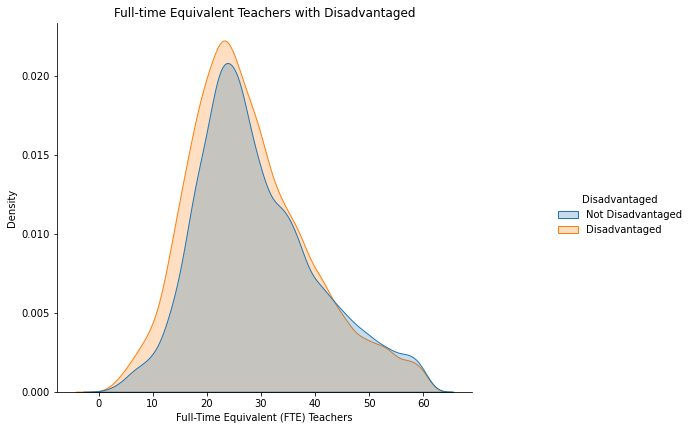

In [41]:
_ = sns.displot(df, x='Full-Time Equivalent (FTE) Teachers', hue='Disadvantaged', kind="kde", fill=True)
_.fig.set_size_inches(10,6)
plt.title("Full-time Equivalent Teachers with Disadvantaged")

-------

In [42]:
# percentage ethnicity in disadvantaged vs not disadvantaged group



------------

### Basic statistics on main dataset

In [43]:
df.describe().T

count          mean  \
District Code_x                                     32655.0  6.218219e+05   
Total Enrollment                                    32655.0  6.852738e+02   
Full-Time Equivalent (FTE) Teachers                 32655.0  2.840184e+01   
Pupil/Teacher Ratio                                 32655.0  2.418363e+01   
Total Revenue (TOTALREV) per Pupil                  32655.0  1.334153e+04   
Total Revenue - Local Sources (TLOCREV) per Pupil   32655.0  4.703457e+03   
Total Revenue - State Sources (TSTREV) per Pupil    32655.0  7.647895e+03   
Total Revenue - Federal Sources (TFEDREV) per P...  32655.0  9.901152e+02   
Total Current Expenditures - Instruction (TCURI...  32655.0  6.933184e+03   
Total Current Expenditures - Support Services (...  32655.0  3.969299e+03   
Total Current Expenditures - Other El-Sec Progr...  32655.0  4.540792e+02   
Total Current Expenditures - Salary (Z32) per P...  32655.0  6.557007e+03   
Total Current Expenditures - Benefits (Z34) per...  32655.0  2.937852e+03   
Total Expenditures (TOTALEXP) per Pupil             32655.0  1.321291e+04   
Total Expenditures - Capital Outlay (TCAPOUT) p...  32655.0  1.106216e+03   
Total Current Expenditures - Non El-Sec Program...  32655.0  1.310638e+02   
Total Current Expenditures (TCURELSC) per Pupil     32655.0  1.135662e+04   
Instructional Expenditures (E13) per Pupil          32655.0  6.933184e+03   
Count Enrollment per ethnicity                      32655.0  2.932031e+02   
County Code                                         32655.0  2.857229e+01   
District Code_y                                     32655.0  6.765002e+04   
School Code                                         32655.0  5.152044e+06   
Test Id                                             32655.0  1.500781e+00   
Mean Scale Score                                    32655.0  2.497552e+03   
Total Tested At Entity Level                        32655.0  3.785420e+02   
Total Tested with Scores                            32655.0  3.783024e+02   
CAASPP Reported Enrollment                          32655.0  1.109143e+02   
Students Tested                                     32655.0  1.091229e+02   
Students with Scores                                32655.0  1.090556e+02   
Total Standard Exceeded                             32655.0  1.951992e+01   
Total Standard Met                                  32655.0  2.550767e+01   
Total Standard Met and Above                        32655.0  4.503411e+01   
Total Standard Nearly Met                           32655.0  2.749453e+01   
Total Standard Not Met                              32655.0  3.657712e+01   
Zip Code                                            32655.0  9.323508e+04   
Percentate Std Exceed                               32655.0  2.011876e+01   
Percentage Std Met                                  32655.0  2.476374e+01   
Percentage Std Nearly Met                           32655.0  2.479192e+01   
Percentage Std Not Met                              32655.0  3.025794e+01   
Percentage Std Met and Above                        32655.0  4.491159e+01   
Pass                                                32655.0  4.488250e+01   
Fail                                                32655.0  5.504985e+01   

                                                             std        min  \
District Code_x                                     1.391257e+04  600006.00   
Total Enrollment                                    2.719476e+02      11.00   
Full-Time Equivalent (FTE) Teachers                 1.116548e+01       0.50   
Pupil/Teacher Ratio                                 2.565757e+00      17.08   
Total Revenue (TOTALREV) per Pupil                  1.652203e+03    8968.00   
Total Revenue - Local Sources (TLOCREV) per Pupil   2.431525e+03     392.00   
Total Revenue - State Sources (TSTREV) per Pupil    2.352450e+03    1571.00   
Total Revenue - Federal Sources (TFEDREV) per P...  4.852267e+02     143.00   
Total Current Expenditures - In

## Correlation Tables

In [44]:
#Correlation of revenue sources Vs Scores and Pass Fail
corr_columns = ['School Name', 'District Name', 'District Code_x',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr = df.drop(columns = corr_columns)
corr = df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

In [45]:
#Correlation of expenditures with scores
corr_columns = ['School Name', 'District Name', 'District Code_x','Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
                'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

-------

## Best fit line added to scatterplots

In [46]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.4f} + {:.4f}x'.format(a, b))

    return a, b

best fit line:
y = 2574.8303 + -0.0058x


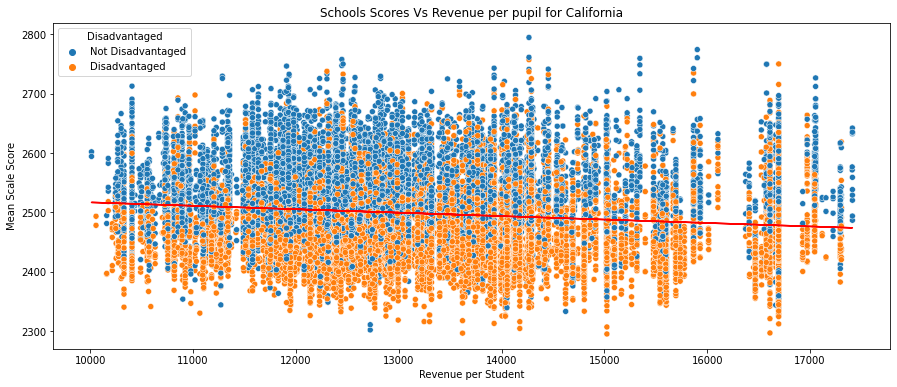

In [47]:
df_revenue=df[df['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],hue=df_revenue['Disadvantaged'])
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Scores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2574.8303 + -0.0058x


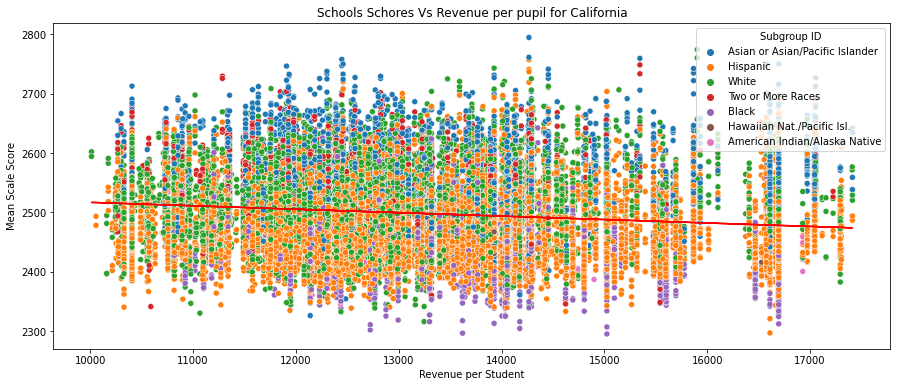

In [48]:
#We are looking at the schools and were are they in the revenue/score comparison
df_revenue=df[df['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_revenue['Total Revenue (TOTALREV) per Pupil '],df_revenue['Mean Scale Score'],hue=df_revenue['Subgroup ID'])
yfit = [a + b * xi for xi in df_revenue['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_revenue['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

## Compare scores with Total Enrollment of schools, on the correlation, there seems to be a positive correlation.

best fit line:
y = 2439.1588 + 0.0852x


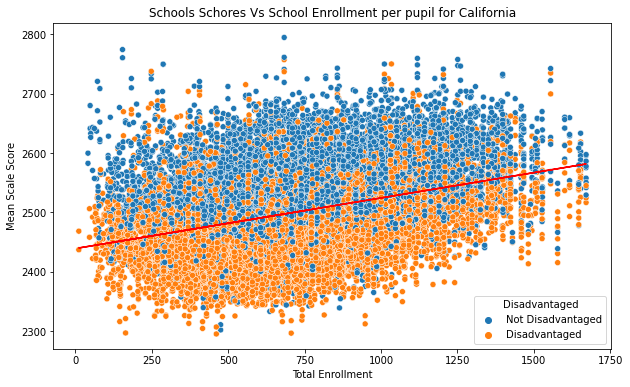

In [49]:
a, b = best_fit(df['Total Enrollment'],df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df['Total Enrollment'],df['Mean Scale Score'], hue=df['Disadvantaged'])
yfit = [a + b * xi for xi in df['Total Enrollment']]
plt.plot(df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2439.1588 + 0.0852x


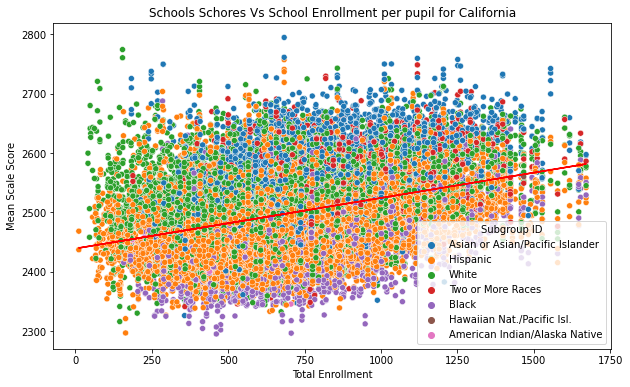

In [50]:
a, b = best_fit(df['Total Enrollment'],df['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df['Total Enrollment'],df['Mean Scale Score'], hue=df['Subgroup ID'])
yfit = [a + b * xi for xi in df['Total Enrollment']]
plt.plot(df['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment per pupil for California')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

## Teacher/Student Ratio also showed a positive correlation, let's look at it

best fit line:
y = 2499.3352 + -0.0737x


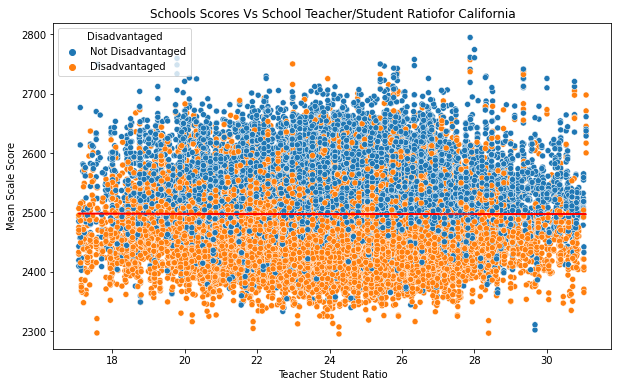

In [51]:
df_ts=df[df['Pupil/Teacher Ratio']<40]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Disadvantaged'])
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

## It would seem that being Economically Disadvantaged has a high impact on success, we will separate the dataset on Disadvantaged and non Disadvantaged to see the mpact of other factors, like revenue

In [52]:
df_dis= df[df['Disadvantaged']=='Disadvantaged']
df_notDis = df[df['Disadvantaged']=='Not Disadvantaged']

best fit line:
y = 2506.5997 + -0.0030x


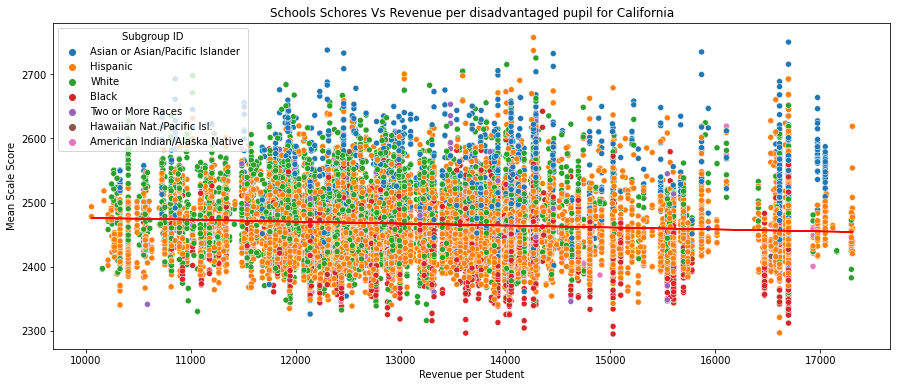

In [53]:
df_dis_r=df_dis[df_dis['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_dis_r['Total Revenue (TOTALREV) per Pupil '],df_dis_r['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_dis_r['Total Revenue (TOTALREV) per Pupil '],df_dis_r['Mean Scale Score'],hue=df_dis_r['Subgroup ID'])
yfit = [a + b * xi for xi in df_dis_r['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_dis_r['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per disadvantaged pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2565.9371 + -0.0024x


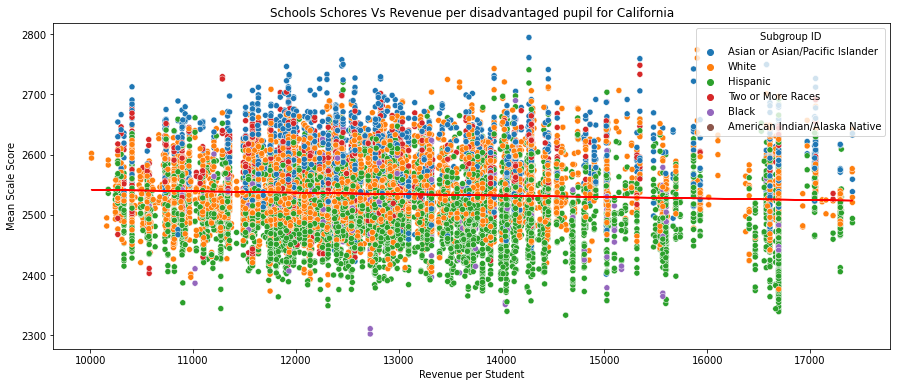

In [54]:
df_ndis_r=df_notDis[df_notDis['Total Revenue (TOTALREV) per Pupil ']>=10000]
a, b = best_fit(df_ndis_r['Total Revenue (TOTALREV) per Pupil '],df_ndis_r['Mean Scale Score'])
plt.figure(figsize=(15,6))
sns.scatterplot(df_ndis_r['Total Revenue (TOTALREV) per Pupil '],df_ndis_r['Mean Scale Score'],hue=df_ndis_r['Subgroup ID'])
yfit = [a + b * xi for xi in df_ndis_r['Total Revenue (TOTALREV) per Pupil ']]
plt.plot(df_ndis_r['Total Revenue (TOTALREV) per Pupil '], yfit,color='red')
plt.title('Schools Schores Vs Revenue per disadvantaged pupil for California')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

## After looking at these separately there seems to be a very flat impact for Disadvantaged students, while for Not Disadvantaged we see a slight positive correlation. Let's see it in numbers

In [55]:
#Correlation for non disadvantaged students
corr_columns = ['School Name', 'District Name', 'District Code_x',
        'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_notDis.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

In [56]:
#Correlation for non disadvantaged students
corr_columns = ['School Name', 'District Name', 'District Code_x',
        'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       'Instructional Expenditures (E13) per Pupil ', 'Subgroup ID','County Code', 'District Code_y',
       'School Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Zip Code','Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above']
df_corr= df_dis.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

In [57]:
#df.columns

## Looking at separate disadvantaged students scores vs school enrollment

best fit line:
y = 2462.3846 + 0.0104x


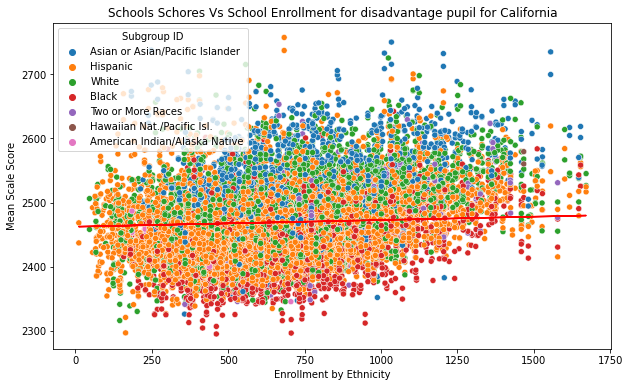

In [58]:
a, b = best_fit(df_dis['Count Enrollment per ethnicity'],df_dis['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_dis['Total Enrollment'],df_dis['Mean Scale Score'], hue=df_dis['Subgroup ID'])
yfit = [a + b * xi for xi in df_dis['Total Enrollment']]
plt.plot(df_dis['Total Enrollment'], yfit, color='red')
plt.title('Schools Schores Vs School Enrollment for disadvantage pupil for California')
plt.xlabel('Enrollment by Ethnicity')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2547.2153 + -0.0464x


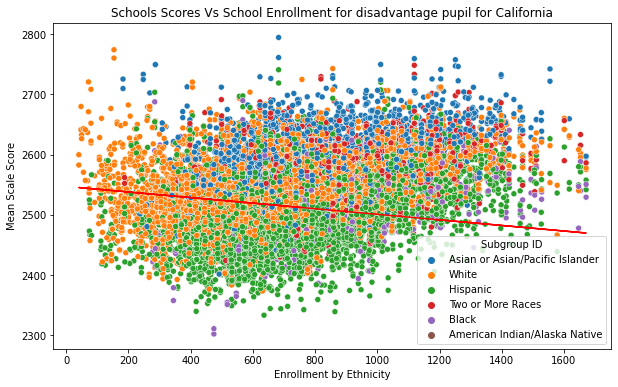

In [59]:
a, b = best_fit(df_notDis['Count Enrollment per ethnicity'],df_notDis['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_notDis['Total Enrollment'],df_notDis['Mean Scale Score'], hue=df_notDis['Subgroup ID'])
yfit = [a + b * xi for xi in df_notDis['Total Enrollment']]
plt.plot(df_notDis['Total Enrollment'], yfit, color='red')
plt.title('Schools Scores Vs School Enrollment for disadvantage pupil for California')
plt.xlabel('Enrollment by Ethnicity')
_=plt.ylabel('Mean Scale Score')

## Visualize the Student/Teacher Ratio against students scores

best fit line:
y = 2494.9307 + -1.2254x


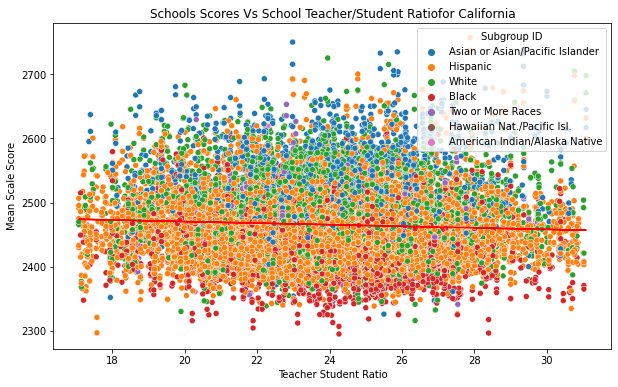

In [60]:
df_ts=df_dis[df_dis['Pupil/Teacher Ratio']<40]
a, b = best_fit(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'])
plt.figure(figsize=(10,6))
sns.scatterplot(df_ts['Pupil/Teacher Ratio'],df_ts['Mean Scale Score'], hue=df_ts['Subgroup ID'])
yfit = [a + b * xi for xi in df_ts['Pupil/Teacher Ratio']]
plt.plot(df_ts['Pupil/Teacher Ratio'], yfit, color='red')
plt.title('Schools Scores Vs School Teacher/Student Ratiofor California')
plt.xlabel('Teacher Student Ratio')
_=plt.ylabel('Mean Scale Score')

### It would look to have a slight positive impact the size of the student/teacher ratio, with higher than 35 to be below the bar.

--------------------

## Black and Hispanic students have the lower scores and the impact other factors doesn't seem to impact greatly being disadvantaged. 
## What percentage of students of each ethnicity are Disadvantaged and is revenue and expense of some impact.

In [61]:
df.columns

Index(['School Name', 'District Name', 'District Code_x', 'Total Enrollment',
       'Full-Time Equivalent (FTE) Teachers', 'Pupil/Teacher Ratio',
       'Total Revenue (TOTALREV) per Pupil ',
       'Total Revenue - Local Sources (TLOCREV) per Pupil ',
       'Total Revenue - State Sources (TSTREV) per Pupil',
       'Total Revenue - Federal Sources (TFEDREV) per Pupil ',
       'Total Current Expenditures - Instruction (TCURINST) per Pupil ',
       'Total Current Expenditures - Support Services (TCURSSVC) per Pupil ',
       'Total Current Expenditures - Other El-Sec Programs (TCUROTH) per Pupil',
       'Total Current Expenditures - Salary (Z32) per Pupil ',
       'Total Current Expenditures - Benefits (Z34) per Pupil ',
       'Total Expenditures (TOTALEXP) per Pupil ',
       'Total Expenditures - Capital Outlay (TCAPOUT) per Pupil ',
       'Total Current Expenditures - Non El-Sec Programs (TNONELSE) per Pupil',
       'Total Current Expenditures (TCURELSC) per Pupil',
       '

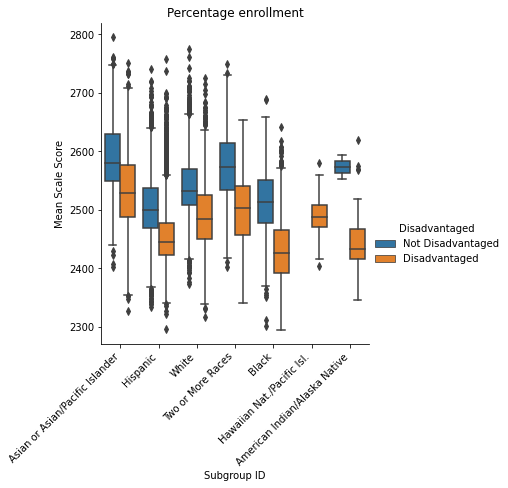

In [62]:
sns.catplot(x="Subgroup ID", y='Mean Scale Score', hue='Disadvantaged',kind="box", data=df_revenue)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percentage enrollment')

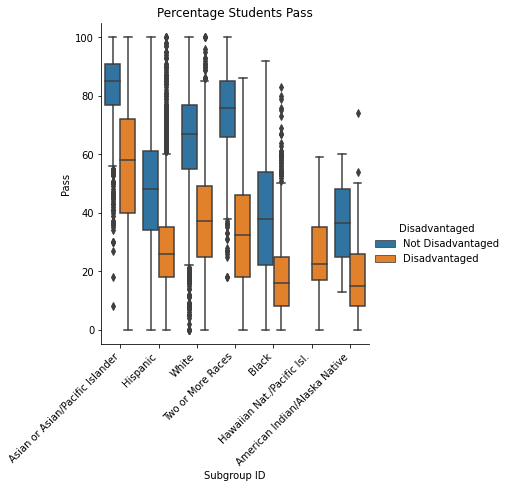

In [63]:
sns.catplot(x="Subgroup ID", y="Pass", hue="Disadvantaged", kind="box", data=df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percentage Students Pass')

## Looking at the ethnicities with lower scores, and how the revenue per student impacts them, we can see that lower than 12000 per student the scores trend is positive. After 12000 it becomes negative.

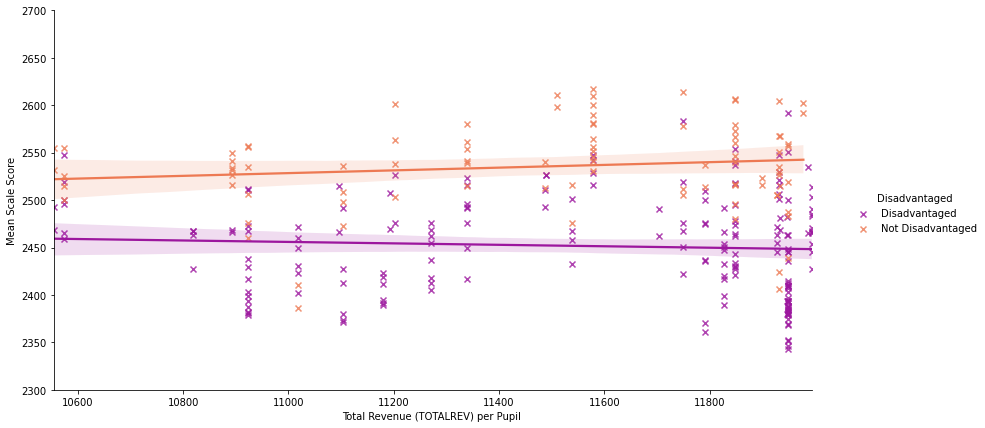

In [64]:
black_df=df[df['Subgroup ID']=='Black']
black_df=black_df[black_df['Total Revenue (TOTALREV) per Pupil ']<=12000]
g = sns.FacetGrid(black_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))
g.add_legend()

In [65]:
df_corr= black_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

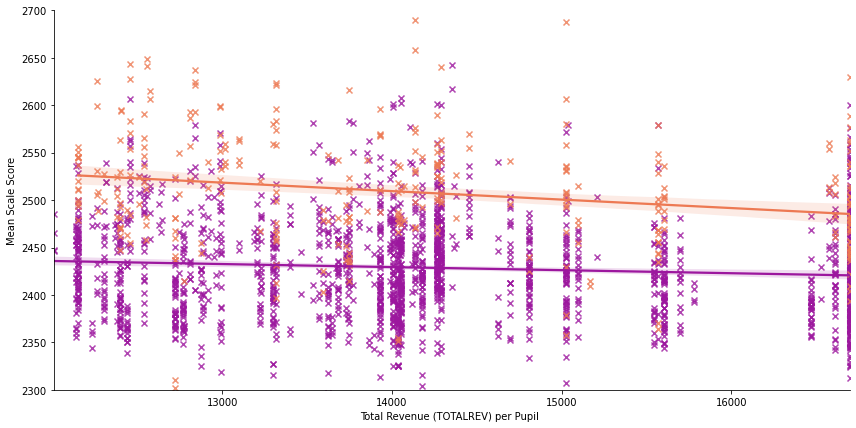

In [66]:
hf_black_df=df[df['Subgroup ID']=='Black']
hf_black_df=hf_black_df[hf_black_df['Total Revenue (TOTALREV) per Pupil ']>12000]
g = sns.FacetGrid(hf_black_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))

In [67]:
df_corr= hf_black_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

### Let's look at not disadvantaged Hispanic Students performance.

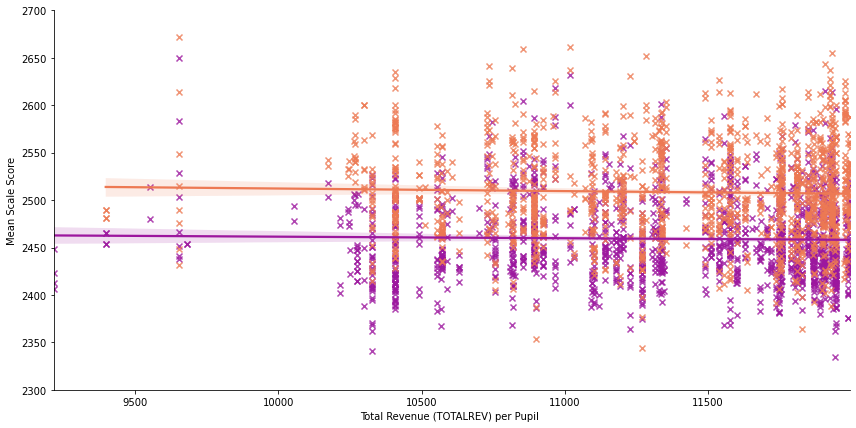

In [71]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
hispanic_df=hispanic_df[hispanic_df['Total Revenue (TOTALREV) per Pupil ']<=12000]
g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))


In [72]:
df_corr= hispanic_df.drop(columns= corr_columns)
corr=df_corr.corr()
corr.style.background_gradient(cmap="YlGnBu")

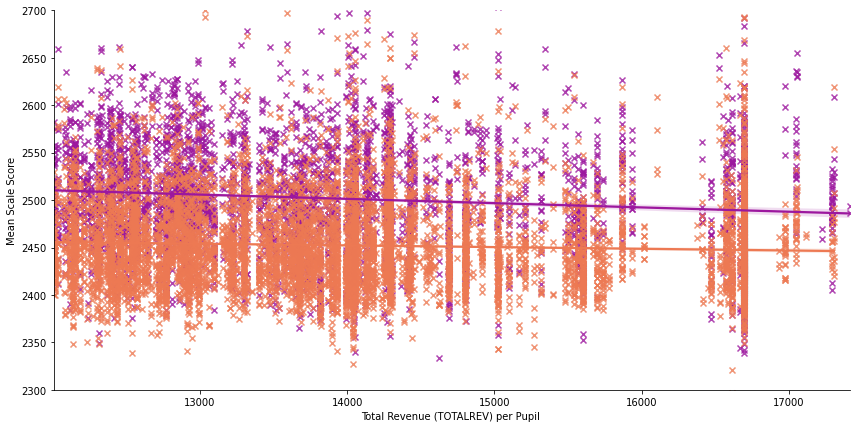

In [73]:
hf_hispanic_df=df[df['Subgroup ID']=='Hispanic']
hf_hispanic_df=hf_hispanic_df[hf_hispanic_df['Total Revenue (TOTALREV) per Pupil ']>12000]
g = sns.FacetGrid(hf_hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Revenue (TOTALREV) per Pupil ', 'Mean Scale Score',marker="x")
_=g.set(#xlim=(10000, 20000), 
    ylim=(2300, 2700))

## Let us understand how is that money spent.

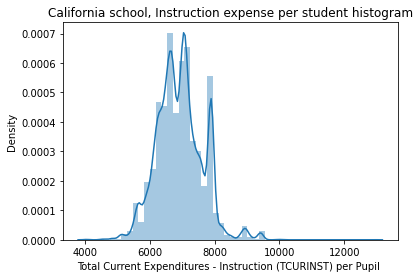

In [74]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Current Expenditures - Instruction (TCURINST) per Pupil '])
plt.title('California school, Instruction expense per student histogram')
plt.show()

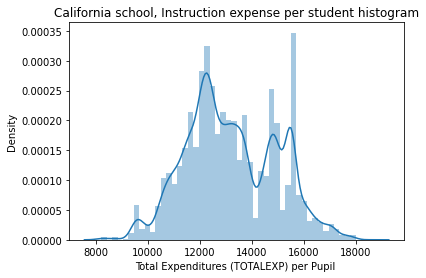

In [75]:
plt.figure(figsize=(6,4))
sns.distplot(df['Total Expenditures (TOTALEXP) per Pupil '])
plt.title('California school, Instruction expense per student histogram')
plt.show()

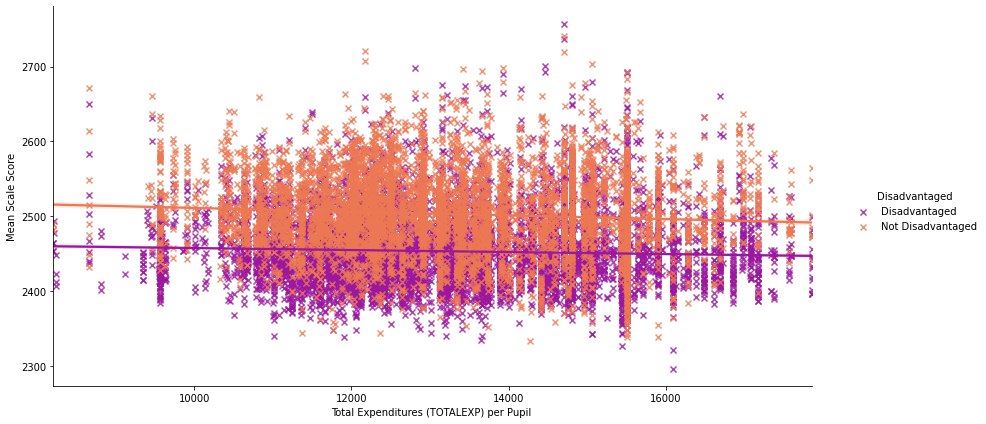

In [76]:
hispanic_df=df[df['Subgroup ID']=='Hispanic']
#hispanic_df=hispanic_df[hispanic_df['Total Expenditures (TOTALEXP) per Pupil ']>10000]

g = sns.FacetGrid(hispanic_df, hue="Disadvantaged", margin_titles=True, height=6, aspect=2, palette="plasma")
g.map(sns.regplot,'Total Expenditures (TOTALEXP) per Pupil ', 'Mean Scale Score',marker="x")
#_=g.set(#xlim=(10000, 20000), 
 #   ylim=(2300, 2700))
g.add_legend()